# DATA832 - Algorithms


# Importing Libraries

In [68]:
# Importing Libraries
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import geopandas as gpd
from matplotlib.patches import Patch
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

import plotly.express as px

# Importing Data

In [48]:
# Importing Data
df = pd.read_csv('data/Country-data.csv')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


# MinMax Scaling

In [49]:
def apply_scaler(df, scaler_type='min_max'):

    if scaler_type == 'min_max':
        # Create a MinMaxScaler object
        scaler = MinMaxScaler()

    elif scaler_type == 'standard':
        # Create a StandardScaler object
        scaler = StandardScaler()

    # Fit the MinMaxScaler object
    scaler.fit(df)

    # Transform the data
    df_scaled = scaler.transform(df)

    # Create a DataFrame for the scaled data
    df_scaled = pd.DataFrame(df_scaled, index=df.index, columns=df.columns)

    return scaler, df_scaled

In [50]:
# Apply MinMax scaling to the data
# scaler, df_scaled = apply_scaler(df_numeric, 'min_max')

# Reducing Dimensionality with PCA

In [51]:
def apply_pca(df, n_components=None):
    # Create a PCA model
    pca = PCA(n_components=n_components)

    # Fit the PCA model
    pca.fit(df)

    # Transform the data
    pca_features = pca.transform(df)

    # Create a DataFrame for the PCA features
    pca_df = pd.DataFrame(pca_features, index=df.index, columns=[f'PC{i+1}' for i in range(pca.n_components_)])

    return pca, pca_df

In [52]:
# Apply PCA to the data
# pca, df_pca = apply_pca(df_scaled, n_components=2)
# df_pca['country'] = df['country']
# df_pca

# Clustering with KMeans

In [53]:
def apply_algo(df, n_clusters=3):
    # Create a KMeans model
    kmeans = KMeans(n_clusters=n_clusters)

    # Fit the KMeans model
    kmeans.fit(df.drop('country', axis=1))

    return kmeans

In [54]:
# Apply KMeans to the PCA features
# kmeans = apply_algo(df_pca, n_clusters=3)
# df_pca['cluster'] = kmeans.labels_
# df_pca

In [55]:
# print(df.columns)

# Pipeline

In [56]:
# Create a pipeline
pipeline = {
    'scaler': 'min_max',
    'pca': 2,
    'kmeans': 3
}

In [57]:
# Function pipeline
def apply_pipeline(pipeline, df):
    # Select only numeric columns
    df_numeric = df.select_dtypes(include=['float64', 'int64'])

    # Scale the data
    scaler, df_scaled = apply_scaler(df_numeric, pipeline['scaler'])

    # Apply PCA
    pca, df_pca = apply_pca(df_scaled, n_components=pipeline['pca'])
    df_pca['country'] = df['country']

    # Apply KMeans
    kmeans = apply_algo(df_pca, n_clusters=pipeline['kmeans'])
    df_pca['cluster'] = kmeans.labels_

    # Calculate the cluster values for Luxembourg, China, and Gabon
    luxembourg_cluster = df_pca.loc[df_pca['country'] == 'Luxembourg', 'cluster'].values[0]
    china_cluster = df_pca.loc[df_pca['country'] == 'China', 'cluster'].values[0]
    gabon_cluster = df_pca.loc[df_pca['country'] == 'Gabon', 'cluster'].values[0]

    # Define the assign_help_status function
    def assign_help_status(row):
        if row['cluster'] == luxembourg_cluster:
            return "don't need help"
        elif row['cluster'] == china_cluster:
            return "could be helped"
        elif row['cluster'] == gabon_cluster:
            return "need help"
        else:
            return "unknown"

    # Apply the assign_help_status function to each row in the DataFrame and assign the results to a new column
    df_pca['help_status'] = df_pca.apply(assign_help_status, axis=1)

    return df_pca

In [58]:
# Apply the pipeline to the data
df_pca = apply_pipeline(pipeline, df)
df_pca

     child_mort   exports    health   imports    income  inflation  \
0      0.426485  0.049482  0.358608  0.257765  0.008047   0.126144   
1      0.068160  0.139531  0.294593  0.279037  0.074933   0.080399   
2      0.120253  0.191559  0.146675  0.180149  0.098809   0.187691   
3      0.566699  0.311125  0.064636  0.246266  0.042535   0.245911   
4      0.037488  0.227079  0.262275  0.338255  0.148652   0.052213   
..          ...       ...       ...       ...       ...        ...   
162    0.129503  0.232582  0.213797  0.302609  0.018820   0.063118   
163    0.070594  0.142032  0.192666  0.100809  0.127750   0.463081   
164    0.100779  0.359651  0.312617  0.460715  0.031200   0.150725   
165    0.261441  0.149536  0.209447  0.197397  0.031120   0.257000   
166    0.391918  0.184556  0.253574  0.177275  0.021473   0.168284   

     life_expec  total_fer      gdpp  
0      0.475345   0.736593  0.003073  
1      0.871795   0.078864  0.036833  
2      0.875740   0.274448  0.040365  
3  

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,PC1,PC2,country,cluster,help_status
0,-0.599078,0.095490,Afghanistan,1,need help
1,0.158474,-0.212092,Albania,0,could be helped
2,0.003686,-0.135867,Algeria,0,could be helped
3,-0.650235,0.275975,Angola,1,need help
4,0.200711,-0.064662,Antigua and Barbuda,0,could be helped
...,...,...,...,...,...
162,-0.160078,-0.029625,Vanuatu,0,could be helped
163,0.061133,-0.171339,Venezuela,0,could be helped
164,0.115512,-0.032034,Vietnam,0,could be helped
165,-0.332968,-0.019824,Yemen,1,need help


In [59]:
# Count the number of countries in each cluster
df_pca['cluster'].value_counts()


0    83
1    46
2    38
Name: cluster, dtype: int64

# Visualizing the Clusters in map

/var/folders/k1/k53d2l5d76xgyv8wbt38h3v40000gn/T/ipykernel_81341/1773246529.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


TypeError: '<=' not supported between instances of 'str' and 'float'

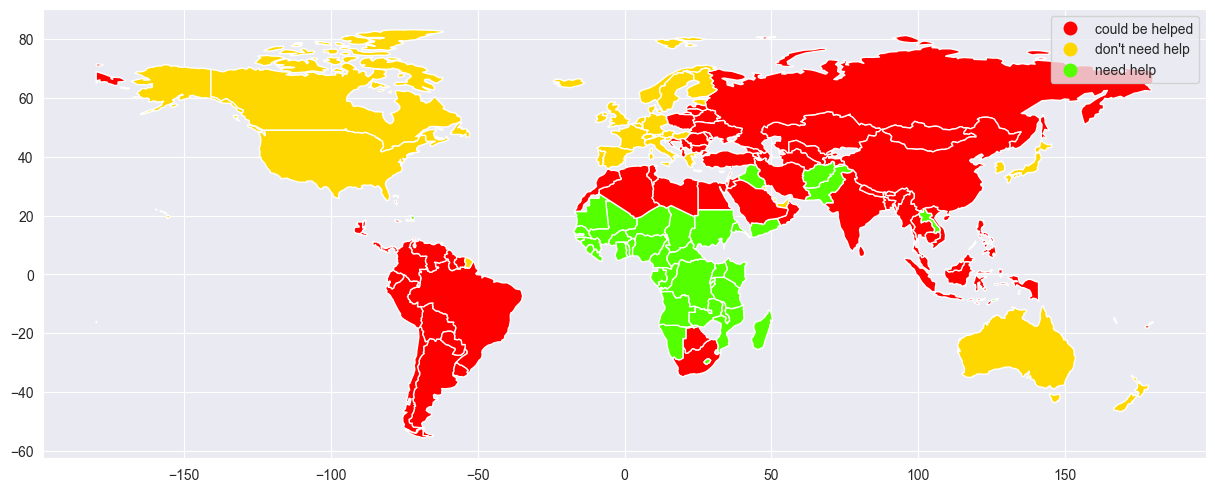

In [76]:
# Load geographic data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge geographic data with your DataFrame
merged = world.set_index('name').join(df_pca.set_index('country'))

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='help_status', ax=ax, legend=True, cmap='prism')

# Create a ScalarMappable object
norm = Normalize(vmin=merged['help_status'].min(), vmax=merged['help_status'].max())
sm = ScalarMappable(norm=norm, cmap='prism')

# Add colorbar
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Help Status', fontsize=30)

plt.show()